## Misanthropic Neighbors

This notebook is a numerical solution to Five Thirty Eight's puzzel

http://fivethirtyeight.com/features/can-you-solve-the-puzzle-of-your-misanthropic-neighbors/

In [2]:
using DataFrames
using Gadfly

In [3]:
function sim(neighborhoodSize::Int)

    possibleLocation=[i for i=1:neighborhoodSize]
    houses=0

    while size(possibleLocation)[1]>0
        ind=rand(possibleLocation)

        if ind==1
            possibleLocation=possibleLocation[!(possibleLocation.==ind)]
            possibleLocation=possibleLocation[!(possibleLocation.==ind+1)]

        elseif ind==neighborhoodSize
            possibleLocation=possibleLocation[!(possibleLocation.==ind)]
            possibleLocation=possibleLocation[!(possibleLocation.==ind-1)]
        else

            possibleLocation=possibleLocation[!(possibleLocation.==ind)]
            possibleLocation=possibleLocation[!(possibleLocation.==ind+1)]
            possibleLocation=possibleLocation[!(possibleLocation.==ind-1)]
        end

        houses+=1
    end
    
    return(houses/neighborhoodSize)
end   

sim (generic function with 1 method)

In [8]:
#run several simulations
neighborhoodSize=[10,100,500,1000,10000];
numSims=100
df = DataFrame(N10 = zeros(numSims), N100 = zeros(numSims),N500 = zeros(numSims),
    N1000 = zeros(numSims),N10000 = zeros(numSims),N100000 = zeros(numSims))

for nn in neighborhoodSize
    for ns=1:numSims
        df[ns,symbol(string('N')*string(nn))]=sim(nn)
    end
end
        

In [9]:
#Generate some stats
println(colwise(mean,df))
println(colwise(var,df))

Any[

In [14]:
#Plot
layers = Layer[]
colors = [color(c) for c in ["red","grey" ,"blue", "green", "red","grey"]]
for i=2:5
    push!(layers, layer(x=1:100, y=df[:,i], Geom.line,Theme(default_color=colors[i]))[1])
end

p=plot(layers, Guide.ylabel("Proportion of Occupied Houses"),
    Guide.xlabel("Simulation"),
    Guide.title("Misanthropic Neighbors"),
Guide.manual_color_key("Size of Neighbourhood", ["100","500","1000","10000"], ["grey" ,"blue", "green", "red"]))

draw(PDF("Misanthropic_Neighbors.png", 12cm, 12cm), p)

 in depwarn at deprecated.jl:73
 in color at /root/.julia/v0.5/Colors/src/parse.jl:145
 in anonymous at no file
 [inlined code] from essentials.jl:114
 in include_string at loading.jl:355
 in execute_request_0x535c5df2 at /root/.julia/v0.5/IJulia/src/execute_request.jl:177
 [inlined code] from dict.jl:723
 in eventloop at /root/.julia/v0.5/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[14], in expression starting on line 3


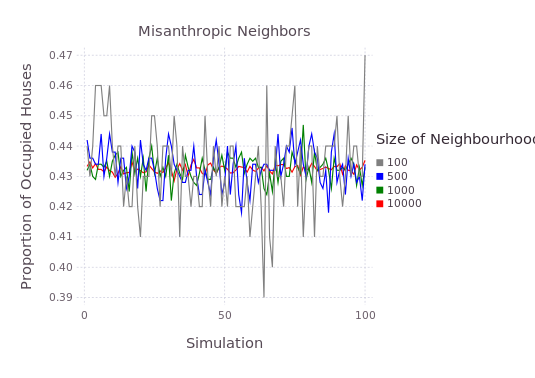

In [15]:
p